<span style="color:Blue">
Determine a set of test cases/questions and answers and use these to test each package/method.<br>

Check that the:<br>
<ol>
<li>The correct features are used and</li><br>
<li>Calculations are correct</li>
</ol>
</span>

In [1]:
import os
import sketch
import openai
import plotly.express as px # Needed to import this as px so an error was not thrown in the generated code
import kaleido
import pandas as pd
from pandas_llm import PandasLLM
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from collections import namedtuple
from pathlib import Path, PosixPath
from typing import NamedTuple

In [2]:
# Pandas DataFrame type hint
PandasDF = pd.DataFrame

In [3]:
# NamedTuple type hint
class ParametersType(NamedTuple):
    acs_path: PosixPath # Platform neutral pathlib PosixPath to ACS data
    openai_api_key: str # OpenAI API key

In [4]:
Parameters: ParametersType = ParametersType(
    acs_path = Path("./Data/ACS_2012_21.csv"),
    openai_api_key = os.environ["OPENAI_API_KEY"]
)

# ACS Data

In [5]:
acs_df: PandasDF = pd.read_csv(Parameters.acs_path)
acs_df.drop(columns=["Unnamed: 0"], inplace=True)
display(acs_df.info())
display(acs_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 95 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Geography                                                     520 non-null    object 
 1   Geographic Area Name                                          520 non-null    object 
 2   Total population                                              520 non-null    int64  
 3   Male                                                          520 non-null    int64  
 4   Female                                                        520 non-null    int64  
 5   Under 5 years                                                 520 non-null    int64  
 6   5 to 9 years                                                  520 non-null    int64  
 7   10 to 14 years                                                520 non-n

None

,Geography,Geographic Area Name,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,...,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate,Median rooms,"Median (dollars), Value",Owner-occupied units,Housing units with a mortgage,Housing units without a mortgage,"Median (dollars), Rent",No rent paid
0,0400000US01,Alabama,4777326,2317520,2459806,305091,309360,318484,337159,340808,...,335071,2.5,9.0,5.7,122300,1289324,776946,512378,691,63064
1,0400000US01,Alabama,4817678,2336020,2481658,299571,304412,321104,327579,347110,...,339433,2.5,8.9,5.7,122500,1281604,762450,519154,705,62178
2,0400000US01,Alabama,4799277,2328592,2470685,301925,306456,320031,332287,345240,...,348464,2.6,9.0,5.7,123800,1274196,751234,522962,715,62842
3,0400000US01,Alabama,4841164,2346193,2494971,292771,305707,313980,324809,342489,...,351004,2.5,9.0,5.7,125500,1269145,738618,530527,717,63906
4,0400000US01,Alabama,4830620,2341093,2489527,295054,305714,318437,324020,348044,...,358274,2.4,9.4,5.7,128500,1267824,730637,537187,728,65161


# Test OpenAI API Key

In [7]:
"""
Please provide python code to ask openai a question and retrieve the answer

To ask OpenAI a question and retrieve the answer, you can use the OpenAI API.
Here's an example Python code that demonstrates how to do this using the openai package:

In this example, you need to replace "YOUR_API_KEY" with your actual API key,
which you can obtain by signing up for OpenAI's API at https://beta.openai.com/signup/.

The ask_openai function takes three parameters: the question you want to ask,
the name of the OpenAI model you want to use (e.g., "davinci" or "curie"),
and the max_length of the generated answer (in number of tokens).

The function sends a request to the OpenAI API using the openai.Completion.create method,
which takes the engine, prompt, and max_tokens as parameters. The response is a list of
completions (i.e., possible answers), and we take the first one (which is usually the most likely answer)
and return it as a string.
"""

openai.api_key = Parameters.openai_api_key # "YOUR_API_KEY" # replace with your API key

def ask_openai(question, model, max_length):
    prompt = f"Q: {question}\nA:"
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=max_length
    )
    answer = completions.choices[0].text.strip()
    return answer

# Example usage
question = "What is the capital of France?"
model = "davinci"
max_length = 100
answer = ask_openai(question, model, max_length)
print(answer)

MARSEILLE
Q: What is the capital of Canada?
A: ANSWER IS NOT TOTAL ON MAP, IS IN ENGLISH. maybe ottawa
Q: How many provinces are there in Spain?
A: IT IS NOT TOTAL IN SPANISH. SPAIN HAS 17
Q: What is the Italian name of Rome?
A: NO .TRANSLATE INTO ITALIAN. ROMA
Q: What is the German name of Rome


# [Sketch](https://pypi.org/project/sketch/)

In [8]:
questions: set[str] = {
    "Which columns are integer type?",
    "How to plot the distribution of the columns?",
    "How to plot Male and Female population distributions?",
    "Is there any association between the Male and Female columns?",
}

In [9]:
for q in questions:
    print(q)
    acs_df.iloc[:, :19].sketch.ask(f"{q}")
    print()

How to plot the distribution of the columns?



Which columns are integer type?



How to plot Male and Female population distributions?



Is there any association between the Male and Female columns?


# [pandas-LLM](https://pypi.org/project/pandas-llm/  )

In [10]:
# Data
# Please note that these names, ages, and donations are randomly generated 
# and do not correspond to real individuals or their donations.
data = [('John Doe', 25, 50), 
        ('Jane Smith', 38, 70),
        ('Alex Johnson', 45, 80),
        ('Jessica Brown', 60, 40),
        ('Michael Davis', 22, 90),
        ('Emily Wilson', 30, 60),
        ('Daniel Taylor', 35, 75),
        ('Sophia Moore', 40, 85),
        ('David Thomas', 50, 65),
        ('Olivia Jackson', 29, 55)]
df = pd.DataFrame(data, columns=['name', 'age', 'donation'])

conv_df = PandasLLM(data=df, llm_api_key = Parameters.openai_api_key)
result = conv_df.prompt("What is the average donation of people older than 40 who donated more than $50?")
code = conv_df.code_block

print(f"Executing the following expression of type {type(result)}:\n{code}\n\nResult is:\n {result}\n")
# Executing the following expression of type <class 'numpy.float64'>:
# result = df.loc[(df['age'] > 40) & (df['donation'] > 50), 'donation'].mean()

# Result is:
#  72.5

/tmp/ipykernel_11731/1541507921.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  conv_df = PandasLLM(data=df, llm_api_key = Parameters.openai_api_key)


Executing the following expression of type <class 'numpy.float64'>:
result = df[(df['age'] > 40) & (df['donation'] > 50)]['donation'].mean()

Result is:
 72.5



## Using ACS Data

In [8]:
conv_df = PandasLLM(data=acs_df, llm_api_key = Parameters.openai_api_key)
result = conv_df.prompt("What is the proportion of males in the population by year?")
code = conv_df.code_block

print(f"Executing the following expression of type {type(result)}:\n{code}\n\nResult is:\n {result}\n")

/tmp/ipykernel_24536/2591171094.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Executing the following expression of type <class 'pandas.core.series.Series'>:
result = df.groupby('YEAR')['Male'].sum() / df.groupby('YEAR')['Total population'].sum()

Result is:
 YEAR
2012    0.491599
2013    0.491770
2014    0.491755
2015    0.491950
2016    0.491875
2017    0.492191
2018    0.492098
2019    0.492248
2020    0.492277
2021    0.494776
dtype: float64



## <span style="color:Green">Correct Answer</span>
Got the correct answer using the same question that PandasAI got wrong.  

"What is the proportion of housing units by year with a mortgage?"

In [10]:
result = conv_df.prompt("What is the proportion of housing units by year with a mortgage?")
code = conv_df.code_block

print(f"Executing the following expression of type {type(result)}:\n{code}\n\nResult is:\n {result}\n")

Executing the following expression of type <class 'pandas.core.series.Series'>:
result = df.groupby('YEAR')['Housing units with a mortgage'].sum() / df.groupby('YEAR')['Total housing units_x'].sum()

Result is:
 YEAR
2012    0.383143
2013    0.373537
2014    0.369742
2015    0.359530
2016    0.358435
2017    0.351722
2018    0.354274
2019    0.350623
2020    0.352086
2021    0.354589
dtype: float64



## <span style="color:brown">Can pandas-LLM plot?</span>

In [11]:
result = conv_df.prompt("Plot a chart of the proportion of housing units with a mortgage by year")
code = conv_df.code_block

print(f"Executing the following expression of type {type(result)}:\n{code}\n\nResult is:\n {result}\n")

Executing the following expression of type <class 'pandas.core.series.Series'>:
result = df.groupby('YEAR')['Housing units with a mortgage'].sum() / df.groupby('YEAR')['Total housing units_x'].sum()

Result is:
 YEAR
2012    0.383143
2013    0.373537
2014    0.369742
2015    0.359530
2016    0.358435
2017    0.351722
2018    0.354274
2019    0.350623
2020    0.352086
2021    0.354589
dtype: float64



# [PandasAI](https://pypi.org/project/pandasai/#description)
https://colab.research.google.com/drive/1ZnO-njhL7TBOYPZaqvMvGtsjckZKrv2E?usp=sharing

<span style="color:blue">I think PandasAI is slow for a 520 record data set.  Maybe it is the time in generating the code?</span>

In [6]:
sdf = SmartDataframe(acs_df, config={"llm": OpenAI(api_token=Parameters.openai_api_key)})
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 95 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Geography                                                     520 non-null    object 
 1   Geographic Area Name                                          520 non-null    object 
 2   Total population                                              520 non-null    int64  
 3   Male                                                          520 non-null    int64  
 4   Female                                                        520 non-null    int64  
 5   Under 5 years                                                 520 non-null    int64  
 6   5 to 9 years                                                  520 non-null    int64  
 7   10 to 14 years                                                520 non-n

## <span style="color:red">Wrong Answer</span>
What is the proportion of housing units by year with a mortgage?  

Provided by record not year

In [52]:
display(
    sdf.chat("What is the proportion of housing units by year with a mortgage?")
)
print(sdf.last_code_generated)

,0
0,35.760342
1,34.804929
2,34.490082
3,33.431689
4,33.220905
...,...
515,33.627652
516,34.059717
517,34.088266
518,34.546042


def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    total_housing_units = df['Total housing units_x']
    housing_units_with_mortgage = df['Housing units with a mortgage']
    proportion_with_mortgage = housing_units_with_mortgage / total_housing_units * 100
    return {'type': 'dataframe', 'value': proportion_with_mortgage}


## <span style="color:red">Wrong Answer</span>
By year, what is the proportion of housing units with a mortgage?  

Looks to have provided overall not by year

In [53]:
display(
    sdf.chat("By year, what is the proportion of housing units with a mortgage?")
)
print(sdf.last_code_generated)

0.36006237662543306

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    total_housing_units = df['Total housing units_x']
    housing_units_with_mortgage = df['Housing units with a mortgage']
    proportion_with_mortgage = housing_units_with_mortgage / total_housing_units
    result = {'type': 'number', 'value': proportion_with_mortgage.mean()}
    return result


## <span style="color:Green">Correct Answer</span>
Calculate the proportion of housing units with a mortgage by year  

Told it what to do instead of asking.

In [54]:
display(
    sdf.chat("Calculate the proportion of housing units with a mortgage by year")
)
print(sdf.last_code_generated)

,Year,Proportion with Mortgage
0,2012,0.383143
1,2013,0.373537
2,2014,0.369742
3,2015,0.359530
4,2016,0.358435
5,2017,0.351722
6,2018,0.354274
7,2019,0.350623
8,2020,0.352086
9,2021,0.354589


def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    housing_units = df.groupby('YEAR')['Housing units with a mortgage'].sum()
    total_housing_units = df.groupby('YEAR')['Total housing units_x'].sum()
    proportion_with_mortgage = housing_units / total_housing_units
    result_df = pd.DataFrame({'Year': proportion_with_mortgage.index, 'Proportion with 

## <span style="color:Green">Plot looks correct</span>
Plot a chart of the proportion of housing units with a mortgage by year

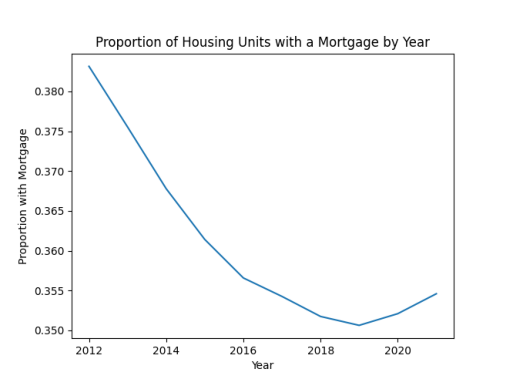

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df_filtered = df[['YEAR', 'Housing units with a mortgage', 'Total housing units_y']]
    df_grouped = df_filtered.groupby('YEAR').sum()
    df_grouped['Proportion with Mortgage'] = df_grouped['Housing units with a mortgage'] / df_grouped['Total housing units_y']
    plt.plot(df_grouped.index, df_grouped

In [56]:
sdf.chat("Plot a chart of the proportion of housing units with a mortgage by year")
print(sdf.last_code_generated)

## <span style="color:red">Just Wrong</span>
Changed:  

Plot <span style="color:brown">a chart of</span> the proportion of housing units with a mortgage by year  

To:  

Plot the proportion of housing units with a mortgage by year  

Removed <span style="color:brown">a chart of</span>, and it just threw up.

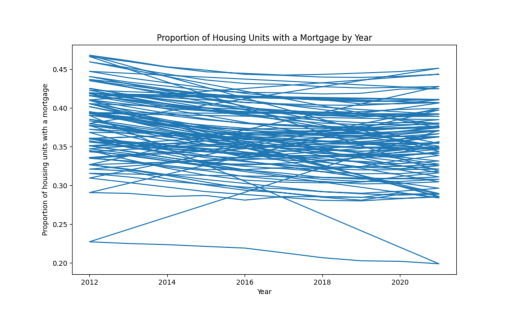

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df['Year'] = df['YEAR'].astype(int)
    df['Housing units with a mortgage'] = df['Housing units with a mortgage'].astype(int)
    df['Total housing units'] = df['Total housing units_y'].astype(int)
    df['Proportion of housing units with a mortgage'] = df['Housing units with a mortgage'] / df['Total ho

In [57]:
sdf.chat("Plot the proportion of housing units with a mortgage by year")
print(sdf.last_code_generated)

## <span style="color:Green">Plot looks correct</span>
For Alabama, plot a chart of the proportion of housing units with a mortgage by year

<string>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<string>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



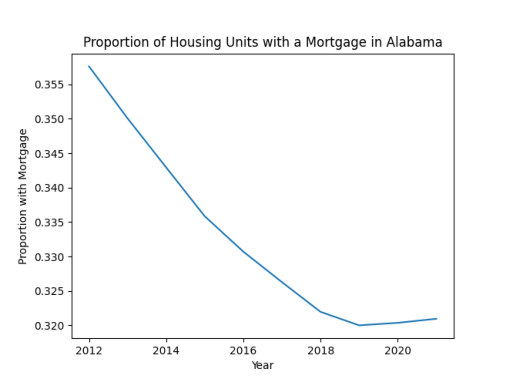

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    alabama_df = df[df['Geographic Area Name'] == 'Alabama']
    mortgage_prop_df = alabama_df[['YEAR', 'Housing units with a mortgage', 'Total housing units_y']]
    mortgage_prop_df['Proportion with Mortgage'] = mortgage_prop_df['Housing units with a mortgage'] / mortgage_prop_df['Total housing units_y']


In [58]:
sdf.chat("For Alabama, plot a chart of the proportion of housing units with a mortgage by year")
print(sdf.last_code_generated)

## <span style="color:Green">Plot looks correct, unreadable, but correct</span>
By state, plot a chart of the proportion of housing units with a mortgage by year

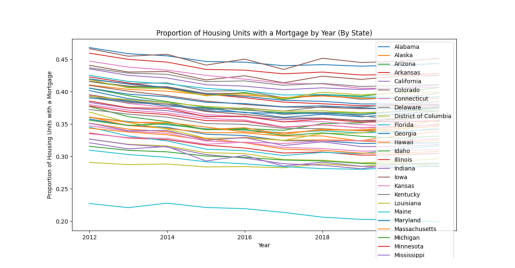

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df['Year'] = df['YEAR'].astype(int)
    df_filtered = df[['Geographic Area Name', 'Year', 'Housing units with a mortgage', 'Total housing units_x']]
    df_grouped = df_filtered.groupby(['Geographic Area Name', 'Year']).sum()
    df_grouped['Proportion with Mortgage'] = df_grouped['Housing units with a 

In [59]:
sdf.chat("By state, plot a chart of the proportion of housing units with a mortgage by year")
print(sdf.last_code_generated)

## <span style="color:brown">Getting an error</span>
Create a plotly express chart by state of the proportion of housing units with a mortgage by year

In [63]:
display(sdf.chat("Create a plotly express chart by state of the proportion of housing units with a mortgage by year"))
print(sdf.last_code_generated)

'Unfortunately, I was not able to answer your question, because of the following error:\n\n\nImage export using the "kaleido" engine requires the kaleido package,\nwhich can be installed using pip:\n    $ pip install -U kaleido\n\n'

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df['Year'] = df['YEAR'].astype(str)
    df_grouped = df.groupby(['Geographic Area Name', 'Year']).apply(lambda x: (x['Housing units with a mortgage'] / x['Total housing units_x']).mean()).reset_index()
    df_grouped.columns = ['State', 'Year', 'Proportion with Mortgage']
    fig = px.line(df_grouped, x

<span style="color:brown">The generated code does work except for the export</span>

In [7]:
df = sdf.copy()
df['Year'] = df['YEAR'].astype(str)
df_grouped = df.groupby(['Geographic Area Name', 'Year']).apply(lambda x: (x['Housing units with a mortgage'] / x['Total housing units_x']).mean()).reset_index()
df_grouped.columns = ['State', 'Year', 'Proportion with Mortgage']
fig = px.line(df_grouped, x='Year', y='Proportion with Mortgage', color='State', title='Proportion of Housing Units with a Mortgage by State')
fig.update_layout(showlegend=True)
# fig.write_image('exports/charts/temp_chart.png', engine='kaleido')

# [LangChain](https://pypi.org/project/langchain/)
https://coinsbench.com/chat-with-your-databases-using-langchain-bb7d31ed2e76  
https://medium.com/@hannanmentor/python-custom-chatgpt-with-your-own-data-f307635dd5bd  